# NiftiLabelsMasker Test

The NiftiLabelsMasker does not seem to apply the mask in the mask_img option before extracting timeseries.

Nilearn version 0.2.2

In [1]:
from nilearn import datasets, plotting, image, masking, input_data
import nibabel as nb
import numpy as np
%matplotlib inline

In [2]:
haxby = datasets.fetch_haxby_simple()
craddock = datasets.fetch_atlas_craddock_2012()

In [3]:
haxby_func = nb.load(haxby['func'][0])

haxby_func_ls = [image.index_img(haxby_func, i) for i in range(0,24)]

subject_mask = masking.compute_multi_epi_mask(haxby_func_ls, threshold = 1)

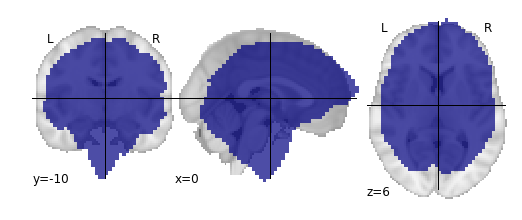

In [4]:
plotting.plot_roi(subject_mask)

Number of parcellations:341


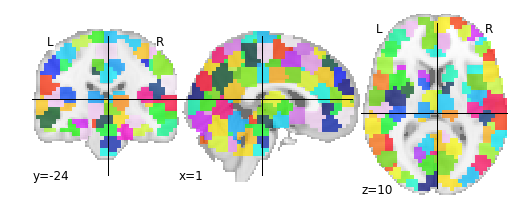

In [5]:
craddock_tcorr2 = nb.load(craddock['tcorr_2level'])

craddock_atlas  = image.index_img(craddock_tcorr2, 30)

plotting.plot_roi(craddock_atlas)

# minus 1 because of 0 = background
print('Number of parcellations:' + str(np.unique(craddock_atlas.get_data()).shape[0] -1))

In [6]:
# Extract time series: 

masker = input_data.NiftiLabelsMasker(craddock_atlas, mask_img = subject_mask)

Ts = masker.fit_transform(haxby_func)

print('Shape of timeseries: ' + str(Ts.shape) + '\nNumber of zero timeseries: ' + str(np.sum(Ts[0,:] ==0))) 

Shape of timeseries: (1452, 341)
Number of zero timeseries: 0


Number of parcellations:303


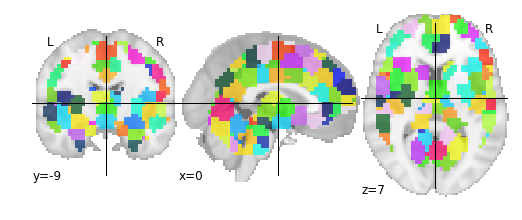

In [7]:
# Apply own masking: 

craddock_atlas_resampled = image.resample_img(craddock_atlas, subject_mask.get_affine(), subject_mask.get_data().shape, interpolation = 'nearest')

craddock_atlas_resampled_data = craddock_atlas_resampled.get_data() 
craddock_atlas_resampled_data[subject_mask.get_data() == 0 ] = 0 
craddock_atlas_resampled  = nb.Nifti1Image(craddock_atlas_resampled_data, craddock_atlas_resampled.get_affine())

plotting.plot_roi(craddock_atlas_resampled)
print('Number of parcellations:' + str(np.unique(craddock_atlas_resampled.get_data()).shape[0] -1))

In [8]:
masker_2 = input_data.NiftiLabelsMasker(craddock_atlas_resampled)

Ts = masker_2.fit_transform(haxby_func)

print('Shape of timeseries: ' + str(Ts.shape) + '\nNumber of zero timeseries: ' + str(np.sum(Ts[0,:] ==0))) 

Shape of timeseries: (1452, 303)
Number of zero timeseries: 0


## Resample to data

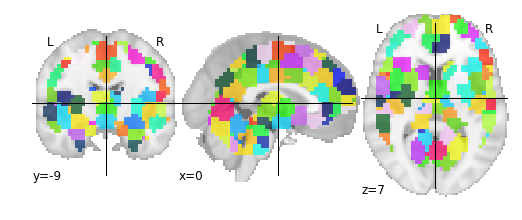

In [10]:
subject_mask_toData = image.resample_img(subject_mask, haxby_func.get_affine(), haxby_func.get_data().shape[:3], interpolation = 'nearest')
craddock_toData     = image.resample_img(craddock_atlas, haxby_func.get_affine(), haxby_func.get_data().shape[:3], interpolation ='nearest')

craddock_toData_data = craddock_toData.get_data()
craddock_toData_data[subject_mask_toData.get_data() == 0] = 0
craddock_toData = nb.Nifti1Image(craddock_toData_data, craddock_toData.get_affine())

plotting.plot_roi(craddock_toData)

In [11]:
masker_3 = input_data.NiftiLabelsMasker(craddock_toData)

Ts = masker_3.fit_transform(haxby_func)

print('Shape of timeseries: ' + str(Ts.shape) + '\nNumber of zero timeseries: ' + str(np.sum(Ts[0,:] ==0))) 

Shape of timeseries: (1452, 303)
Number of zero timeseries: 0
